In [82]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist

In [83]:
train_images, train_labels = loadlocal_mnist(images_path='/mnist-dataset/train-images-idx3-ubyte',
                                             labels_path='/mnist-dataset/train-labels-idx1-ubyte')

FileNotFoundError: [Errno 2] No such file or directory: '/mnist-dataset/train-labels-idx1-ubyte'

In [ ]:
train_images, train_labels = loadlocal_mnist(images_path='./train-images-idx3-ubyte/train-images-idx3-ubyte',
                                             labels_path='./train-labels-idx1-ubyte/train-labels-idx1-ubyte')

In [ ]:
test_images, test_labels = loadlocal_mnist(images_path='./t10k-images-idx3-ubyte/t10k-images-idx3-ubyte',
                                             labels_path='./t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

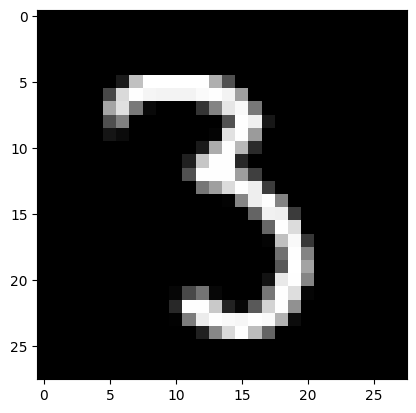

In [ ]:
plt.imshow(train_images[8888].reshape(28,28), cmap='gray')

In [ ]:
train_labels[8888]

3

In [ ]:
feature, hog_img = hog(train_images[8888].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [ ]:
feature.shape

(144,)

<BarContainer object of 144 artists>

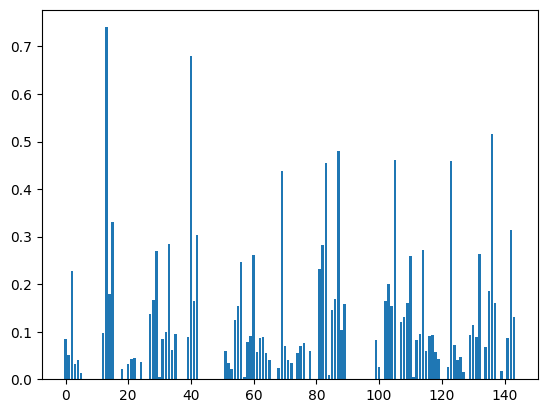

In [ ]:
plt.bar(list(range(feature.shape[0])),feature)

In [ ]:
n_dims = feature.shape[0]

In [ ]:
n_samples = train_images.shape[0]

In [ ]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [ ]:
X_train.shape

(60000, 144)

In [ ]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] =train_labels[i]

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
lb.fit(y_train)

LabelBinarizer()

In [ ]:
y_train_one_hot = lb.transform(y_train)

In [ ]:
y_train_one_hot[8888]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
y_train[8888]

3

In [ ]:
import numpy as np

In [ ]:
label = lb.inverse_transform(np.array([y_train_one_hot[8888]]))

In [ ]:
label[0]

3

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
n_samples = test_images.shape[0]

In [ ]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [ ]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [ ]:
y_test_one_hot = lb.transform(y_test)

In [ ]:
y_pred_one_hot = clf.predict(X_test)

In [ ]:
import random

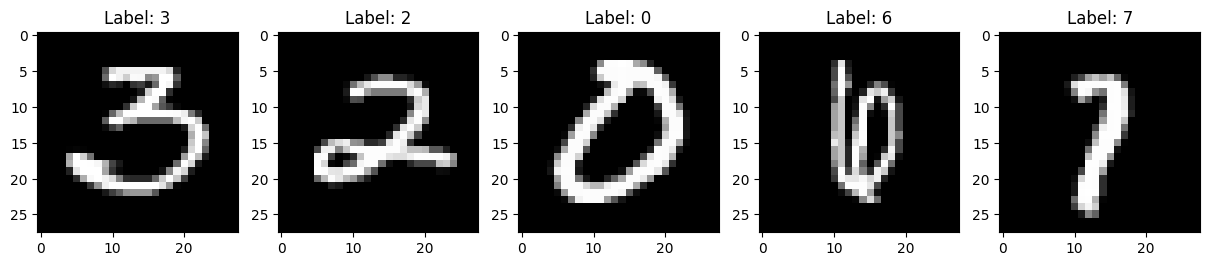

In [ ]:
random_indices = random.sample(range(len(test_images)), 5)

plt.figure(figsize=(15, 3))
for i, index in enumerate(random_indices, 1):
    plt.subplot(1, 5, i)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test[index]}")

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_one_hot)
conf_mat

array([[ 978,    0,    1,    0,    0,    0,    1,    0,    0,    0],
       [   0, 1127,    2,    0,    3,    0,    1,    0,    2,    0],
       [   3,    0, 1009,    5,    3,    0,    0,    8,    2,    2],
       [   2,    0,    7,  977,    0,    5,    0,    6,    7,    6],
       [   5,    2,    0,    1,  952,    0,    4,    4,    1,   13],
       [   2,    0,    1,    9,    1,  869,    2,    2,    5,    1],
       [   4,    2,    1,    0,    3,    5,  942,    0,    1,    0],
       [   0,    3,   13,    3,   10,    2,    0,  985,    2,   10],
       [   3,    3,    2,    6,    2,    2,    0,    1,  949,    6],
       [   2,    0,    0,    5,   11,    2,    0,    5,   13,  971]],
      dtype=int64)

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7','8','9']

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

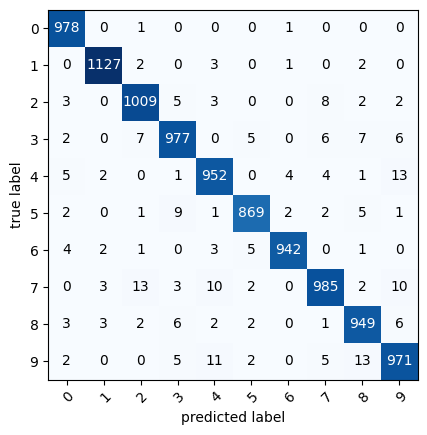

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

In [ ]:
from sklearn.metrics import precision_score


In [ ]:
precision = precision_score(y_test, y_pred_one_hot, average=None)
precision

array([0.97897898, 0.99120493, 0.97393822, 0.97117296, 0.96649746,
       0.9819209 , 0.99157895, 0.97428289, 0.96639511, 0.96233895])

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test, y_pred_one_hot, average=None)
recall

array([0.99795918, 0.99295154, 0.97771318, 0.96732673, 0.9694501 ,
       0.97421525, 0.98329854, 0.95817121, 0.97433265, 0.96233895])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred_one_hot)
accuracy

0.9759

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, y_pred_one_hot, average='macro')
f1

0.9757815807547701